# Application of PCA on Color Images

__Principal Component Analysis (PCA)__ is a method used in machine learning to simplify large datasets while preserving important patterns and trends. It achieves this by reducing the dimensionality of the data, making it easier to explore and visualize.

PCA starts by identifying a new set of dimensions called __principal components__. These components are created by combining the original variables in a way that ensures they are uncorrelated. The first principal component captures the most information from the original data, followed by the second component, and so on. This process allows PCA to squeeze as much relevant information as possible into each new variable, making it easier to understand and work with the data. We can discard components carrying less information and reduce the dimensionality.
<center>
<img src="images/principal_components.png" alt="Principal Components" style="width:50%;">
<br>

(Image from: https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
</center>


### Calculating Principal Components

Assuming we have a dataset $X$ with $n$ observations and $p$ features (variables) having dimension $p$ x $n$:

- First, we need to standarize the dataset to have mean 0 and standard deviation 1 for each feature.
$$X_{std} = \frac{X - \mu}{\sigma}$$

- Then, the covariance matrix $\Sigma$ of the standardized data $X_{std}$ is calculated as:
$$\Sigma = \frac{1}{n}(X_{std} ⋅ X^{T}_{std})$$

- We then calculate the eigenvectors ($v_{i}$) and corresponding eigenvalues ($\lambda_{i}$) of the covariance matrix $\Sigma$.
$$\Sigma v_{i} = \lambda_{i} v_{i}$$

- We then sort the eigenvectors in based on their respective eigenvalues and choose the first k eigenvectors to form the principal components ($V_{k}$):
$$V_k = [v_1, v_2,..., v_k]$$

To reconstruct the data, we project standarised data X_std onto the selected principal components V_k. This reduces the dimensionality of the dataset while retaining most of the variability:
$$X_{projected} = X_{std} ⋅ V_k$$

PCA establishes a robust mathematical basis for dimensionality reduction in extensive datasets. By pinpointing the directions with the most variance and mapping the data onto these axes, PCA enables efficient compression and visualization, making it a key tool in both data analysis and machine learning.

### Image Compression using PCA

PCA is one of the dimensionality reduction techniques that can be used to compress images. Image compression aims to decrease the file size of an image while maintaining its quality as much as possible. It is applied to reduce the cost of the image when storing and transmitting.

#### Image Quantization
<center>
<img src="images/image_quantization.png" alt="Image Quantization" style="width:50%;">
<br>

(Image from: https://www.enjoyalgorithms.com/blog/image-compression-using-pca)
</center>

The picture presented above shows 13 separate shades of gray. It is hard to differentiate between only a dozen gray scales even though the eyes can visibly perceive thousands of colors. Each of these 13 shades can be further divided into many variations, but adding more shades makes it harder to tell them apart. This idea is vital in image compression.

Usually, images are expressed using 8 bits, where black is 0 and white is 255. Even if we change some bits a little bit, human eyes won’t recognize this difference as affecting an image quality (Mannos & Sakrison 1974). For example, by changing odd pixel values to the next even value like turning 1 into two or three into four, the memory that is saved will not show any visible changes. This simple way of compressing images is called quantization.

#### Compressing a grayscale image
Grayscale images can be managed easily since they contain only one color channel. Our data matrix for PCA consists of a 2D NumPy array that represents this kind of an image. By using PCA, we reduce the columns (features) in this matrix but at the same time decrease the quality of our photos due to reduced components’ numbers.

#### Compressing a colored image
RGB images are handled problematically because of their three color channels. These pictures are represented by 3D NumPy array, and thus it is not possible to apply PCA directly. Consequently, we are compelled to first split up the original image into its Red, Green and Blue color channels which would be in form of 2D NumPy arrays each. After that PCA applied on each one of these channels independently and then recompressing them again combines them, turning out as compressed version of your picture.

<center>
<img src="images/rgb_image_matrix.png" alt="RGB Image Matrix" style="width:50%;">
<br>

(Image from: https://subscription.packtpub.com/book/data/9781789613964/2/ch02lvl1sec15/convolution-on-rgb-images)
</center>


#### PCA on colored image
Below are the steps we need to follow to compress our image using PCA
<center>
<img src="images/pca_steps.png" alt="PCA Steps" style="width:100%;">
<br>

(Image from: https://www.enjoyalgorithms.com/blog/image-compression-using-pca)
</center>

In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import cv2
from ipywidgets import interact

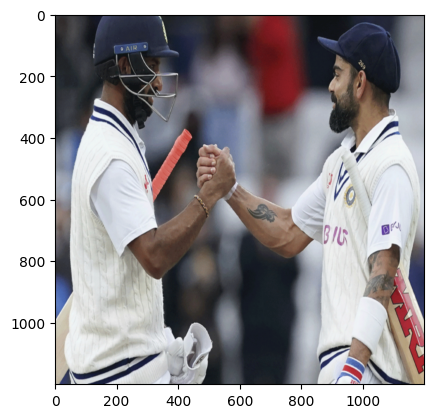

In [3]:
# Loading image
img = cv2.cvtColor(cv2.imread('cricket.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
# Splitting into channels
b_img, g_img, r_img = cv2.split(img)

print("Origina Image")
print(type(img))
print(img.shape)
print("\nRed channel")
print(type(r_img))
print(r_img.shape)
print("\nGreen channel")
print(type(g_img))
print(g_img.shape)
print("\nBlue channel")
print(type(b_img))
print(b_img.shape)

Origina Image
<class 'numpy.ndarray'>
(1200, 1200, 3)

Red channel
<class 'numpy.ndarray'>
(1200, 1200)

Green channel
<class 'numpy.ndarray'>
(1200, 1200)

Blue channel
<class 'numpy.ndarray'>
(1200, 1200)


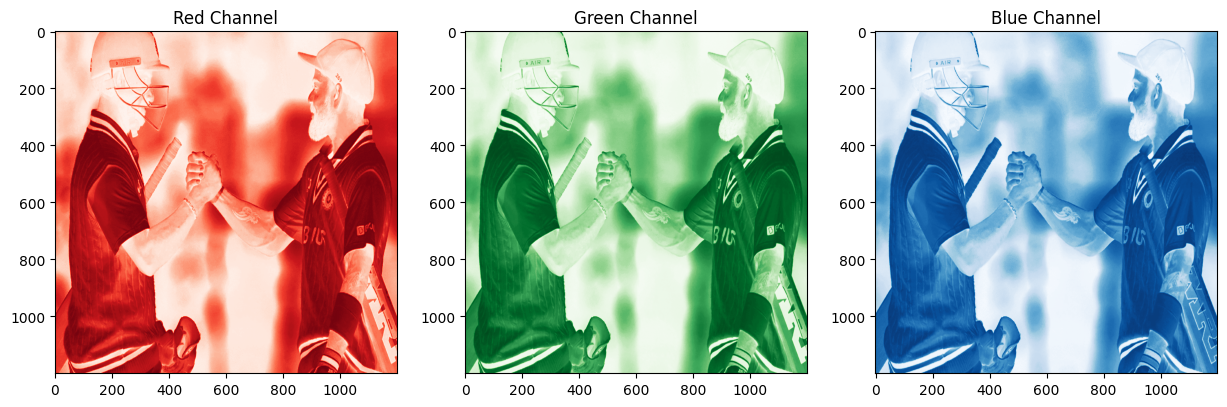

In [5]:
# Showing color channels
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Red Channel")
plt.imshow(r_img, cmap='Reds')
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(g_img, cmap='Greens')
fig.add_subplot(133)
plt.title("Blue Channel")
plt.imshow(b_img, cmap='Blues')
plt.show()

Since, each of the pixel value are between 0 to 255 (both inclusive) we are doing feature scalig by simply dividing each of the pixel value by 255. This ensures all the values are between 0 ans 1 (both inclusive).

In [6]:
# Scaling the data so that all the values are between 0 and 1
df_red = r_img/255
df_green = g_img/255
df_blue = b_img/255

Let's begin by calculating the principal components. We'll limit our analysis to 100 dimensions for PCA, then fit and transform the data. Afterwards, we'll assess the amount of variance explained once the data has been reduced to 100 dimensions.

The proportion of variance explained by each principal component k is given by the ratio of its corresponding eigenvalue to the sum of all eigenvalues i.e.,

$$ \text{Explained Variance Ratio}_k = \frac{\lambda_k}{\sum_{i=1}^{p} \lambda_i}, \text{where p is the total number of componenets} $$

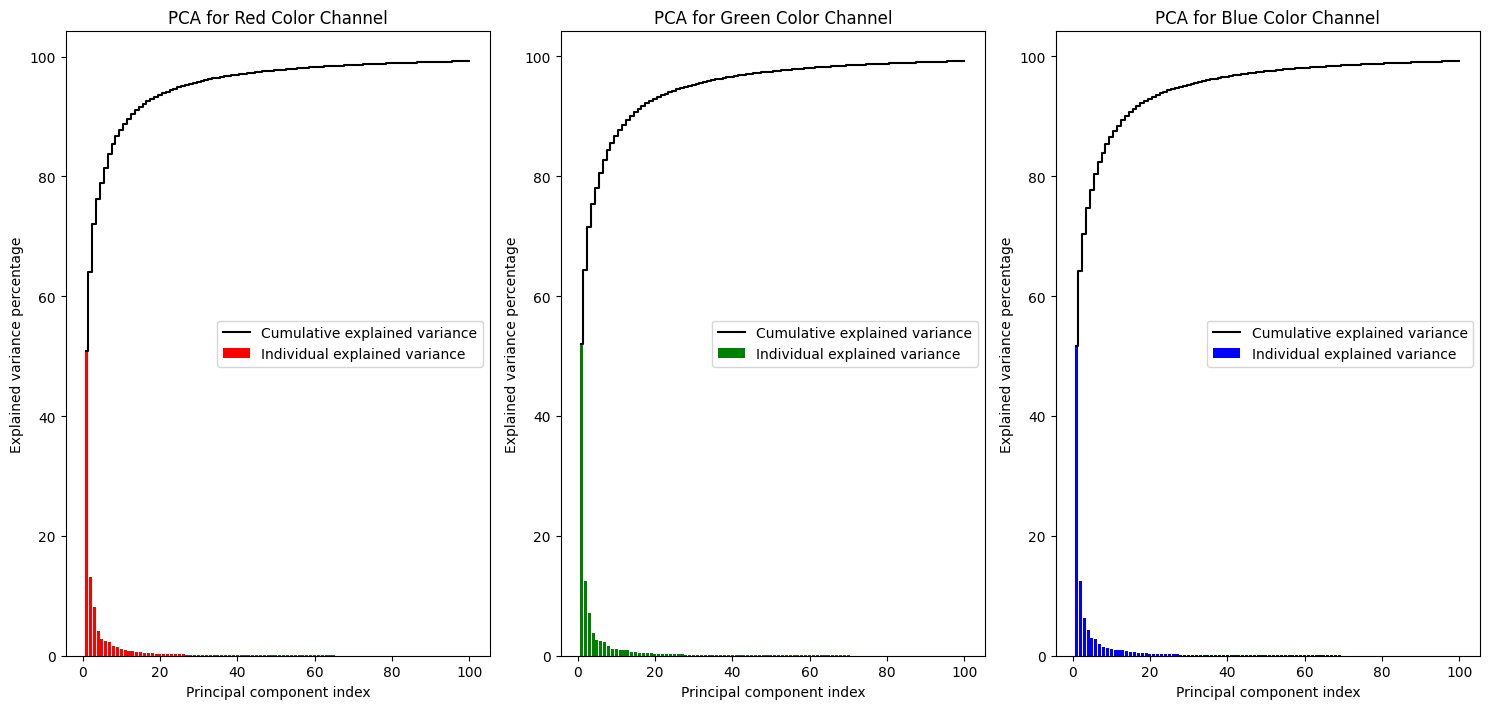

In [7]:
n_components = 100
pca_r = PCA(n_components=n_components)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
exp_var_r = pca_r.explained_variance_ratio_ * 100
cum_exp_var_r = np.cumsum(exp_var_r)
pca_g = PCA(n_components=n_components)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
exp_var_g = pca_g.explained_variance_ratio_ * 100
cum_exp_var_g = np.cumsum(exp_var_g)
pca_b = PCA(n_components=n_components)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
exp_var_b = pca_b.explained_variance_ratio_ * 100
cum_exp_var_b = np.cumsum(exp_var_b)


fig = plt.figure(figsize = (15, 7.2)) 
titles = ['Red', 'Green', 'Blue']
subplots = [131, 132, 133]
cmaps = ['red', 'green', 'blue']
exp_var = [exp_var_r, exp_var_g, exp_var_b]
cum_exp_var = [cum_exp_var_r, cum_exp_var_g, cum_exp_var_b]
for i in range(3):
    fig.add_subplot(subplots[i])
    plt.bar(range(1, 101), exp_var[i], align='center', label='Individual explained variance', color=cmaps[i])

    plt.step(range(1, 101), cum_exp_var[i], where='mid', label='Cumulative explained variance', color='black')

    plt.ylabel('Explained variance percentage')
    plt.xlabel('Principal component index')
    plt.legend(loc='right')
    plt.title(f"PCA for {titles[i]} Color Channel")
    plt.tight_layout()


plt.show()

The tallest bars in the plot correspond to the most prominent features of the channel data. From looking at the plot, it is evident that essential information is mostly contained in the first 45 components. All components beyond 45 may be ignored with only a little loss of information since they just contribute a small fraction of variance in the data set. Hence, we'll continue with 45 components.

In [8]:
n_components = 45
pca_r = PCA(n_components=n_components)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)
pca_g = PCA(n_components=n_components)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_b = PCA(n_components=n_components)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

print(trans_pca_r.shape)
print(trans_pca_g.shape)
print(trans_pca_b.shape)

print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")

(1200, 45)
(1200, 45)
(1200, 45)
Red Channel  : 0.9738022551714595
Green Channel: 0.9706858016945522
Blue Channel : 0.9709001728182327


#### Reconstructing the image
Having finished our PCA dimensionality reduction, the next step is to visualize the image once again. To do this, we need to inverse transform the data and merge the data from all three channels into one. Subsequently, we will display both the original and reduced images side by side.

To reconstruct the image, inverse transform is performed as:
$$ X_{reconstructed} = X_{projected} ⋅ V_k $$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1200, 1200) (1200, 1200) (1200, 1200)
(1200, 1200, 3)


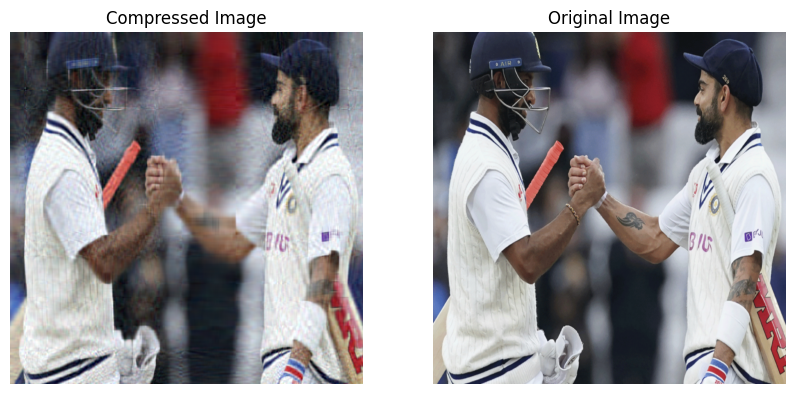

In [9]:
# Inverse Transformation
arr_r, arr_g, arr_b = pca_r.inverse_transform(trans_pca_r), pca_g.inverse_transform(trans_pca_g), pca_b.inverse_transform(trans_pca_b)
print(arr_r.shape, arr_g.shape, arr_b.shape)

# Merging all 3 channels
reduced_img = (cv2.merge((arr_b, arr_g, arr_r)))
print(reduced_img.shape)

# Plotting the images
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Compressed Image")
plt.imshow(reduced_img)
plt.axis('off')
fig.add_subplot(122)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
plt.show()

Even after the compression, we can still identify the image and it is very similar to the original one. However, the dimensionality is reduced by 24x times! No doubt that now the reduced image will be processed much faster by the computer.

Also, below is a slider to play with the number of components and image quality.

In [10]:
def pca (img, n_components):
    b_img, g_img, r_img = cv2.split(img)
    df_blue = b_img/255
    df_green = g_img/255
    df_red = r_img/255
    pca_r = PCA(n_components=n_components)
    pca_r.fit(df_red)
    trans_pca_r = pca_r.transform(df_red)
    pca_g = PCA(n_components=n_components)
    pca_g.fit(df_green)
    trans_pca_g = pca_g.transform(df_green)
    pca_b = PCA(n_components=n_components)
    pca_b.fit(df_blue)
    trans_pca_b = pca_b.transform(df_blue)
    arr_r, arr_g, arr_b = pca_r.inverse_transform(trans_pca_r), pca_g.inverse_transform(trans_pca_g), pca_b.inverse_transform(trans_pca_b)

    img_reduced = (cv2.merge((arr_b, arr_g, arr_r)))
    return img_reduced    

def plot_function(n_components):
    output = pca(img, n_components)
    plt.imshow(output)
    plt.axis('off')
    plt.show()

interact(plot_function, n_components=(1, img.shape[0], 10))

interactive(children=(IntSlider(value=591, description='n_components', max=1200, min=1, step=10), Output()), _…

<function __main__.plot_function(n_components)>

This notebook has shown how Principal Component Analysis (PCA) can be used to compress color images. The image was first separated into three color channels, Red, Green and Blue, each of which is represented as a 2D array. PCA was then applied independently on each channel to reduce their intricacy. After that, the compressed channels were fused together to restore the final compressed RGB image.